In [1]:
%matplotlib inline
import argparse

import torch
from matplotlib import pyplot as plt

from dataloader import MRPGDataSet

In [2]:
parser = argparse.ArgumentParser()
# parser.add_argument('-seed', type=int, default=1)
# parser.add_argument('-dataset', type=str, default='airsim-mrmps-data')
# parser.add_argument('-batch_size', type=int, default=8)
opt = argparse.Namespace()
opt.seed = 1
opt.dataset = 'airsim-mrmps-data'
opt.batch_size = 1
opt.target = 'test'
opt.image_size = 256
opt.camera_num= 5
dataset=MRPGDataSet(opt)
trainset, _ = torch.utils.data.random_split(dataset, [int(0.90 * len(dataset)),len(dataset) - int(0.90 * len(dataset))])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=opt.batch_size, shuffle=False, num_workers=0)

[Loading all data]
[loading data splits: airsim-mrmps-data/splits.pth]
[Number of samples for each camera: 2393]
[loading data stats: airsim-mrmps-data/data_stats.pth]


Origin Image and Labels

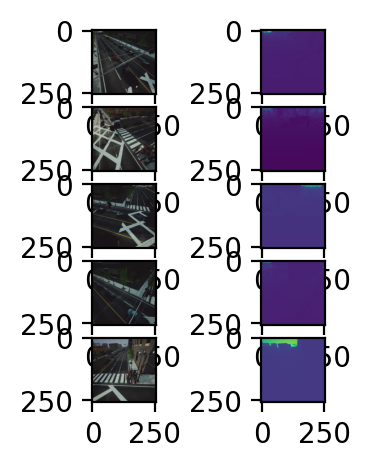

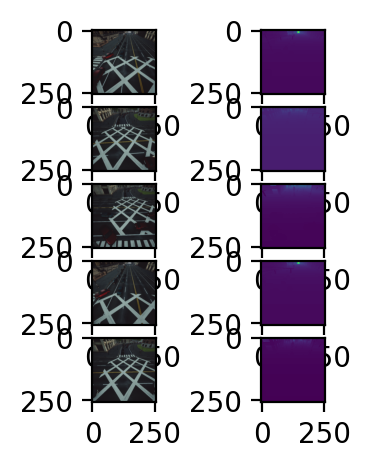

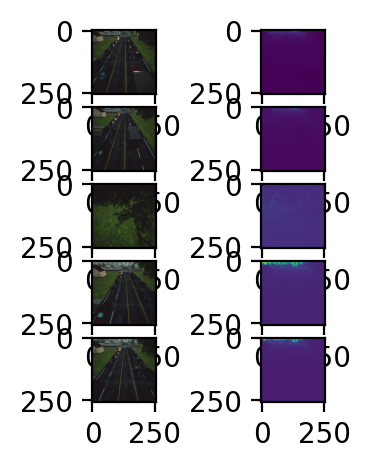

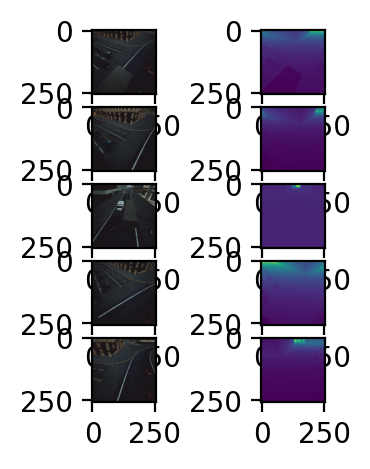

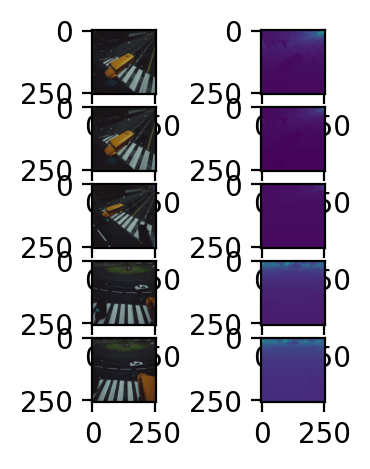

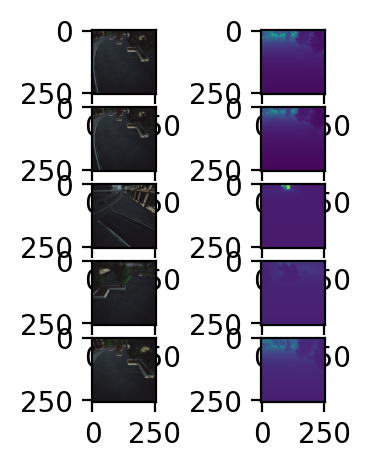

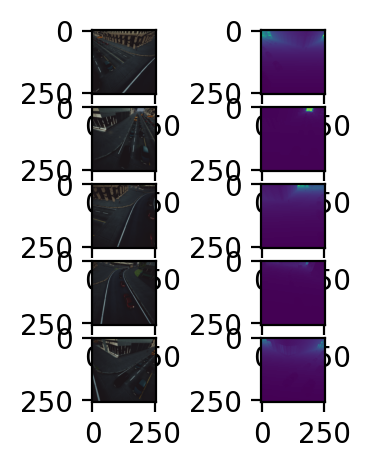

In [ ]:
def visualize(data, opt, dataset):
    plt.figure(figsize=[2,5],dpi=200)
    for i in range(opt.camera_num):
        mean = dataset.dataset.stats['images_mean']
        std = dataset.dataset.stats['images_std']
        img = dataset.dataset.unormalise_object(data[0][0][i],mean,std,'image',use_cuda=False)
        img = (img.permute(1, 2, 0)*255.).byte()
        pose = data[1][0][i]
        depth = data[2][0][i].permute(1, 2, 0)
        depth = (depth - torch.ones_like(depth)*torch.min(depth))/(torch.ones_like(depth)*torch.max(depth) - torch.ones_like(depth)*torch.min(depth))
        depth = (depth*255.).byte()
        plt.subplot(opt.camera_num*2,2,i*2+1)
        plt.imshow(img)
        plt.subplot(opt.camera_num*2,2,i*2+2)
        plt.imshow(depth)
    plt.show()
iteration =iter(trainloader)
for i in range(20):
    data = next(iteration)
    visualize(data,opt,trainset)


